In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [70]:
data_weather = pd.read_csv("files\weather.csv", sep=",")
data_weather.head(8)

,Datetime,Temperature,Precipitation Total,Wind Gust,Wind Speed,Cloud Cover Total,Sunshine Duration
0,NaN,°C,mm,km/h,km/h,%,min
1,2023-04-01T00:00:00,8.740245,0.1,48.6,21.638964,90,0
2,2023-04-01T01:00:00,9.040245,0.2,55.44,22.493519,74,0
3,2023-04-01T02:00:00,8.880245,0.3,55.8,22.26477,72,0
4,2023-04-01T03:00:00,8.690246,0.3,55.44,21.94524,77,0
5,2023-04-01T04:00:00,8.630245,0.3,48.96,22.42427,78,0
6,2023-04-01T05:00:00,8.430245,0.5,48.6,22.91026,77,0
7,2023-04-01T06:00:00,8.690246,0.3,50.039997,23.1774,98,0.5287884


Приведение названий столбцов к pep-8 формату

In [ ]:
data_weather = data_weather[1:]
for i in data_weather.columns:
    data_weather = data_weather.rename(columns={i: i.lower().replace(" ", "_")})

Исследование типов данных, приведение к типам o

In [78]:

data_weather = data_weather.astype({"temperature" : float,
           "precipitation_total": float, "wind_gust": float, 
           "wind_speed": float, "cloud_cover_total": float, "sunshine_duration": float})
data_weather['datetime'] = pd.to_datetime(data_weather['datetime'])


In [74]:
data_weather = data_weather.drop_duplicates()

In [80]:
data_weather.columns

Index(['datetime', 'temperature', 'precipitation_total', 'wind_gust',
       'wind_speed', 'cloud_cover_total', 'sunshine_duration'],
      dtype='object')

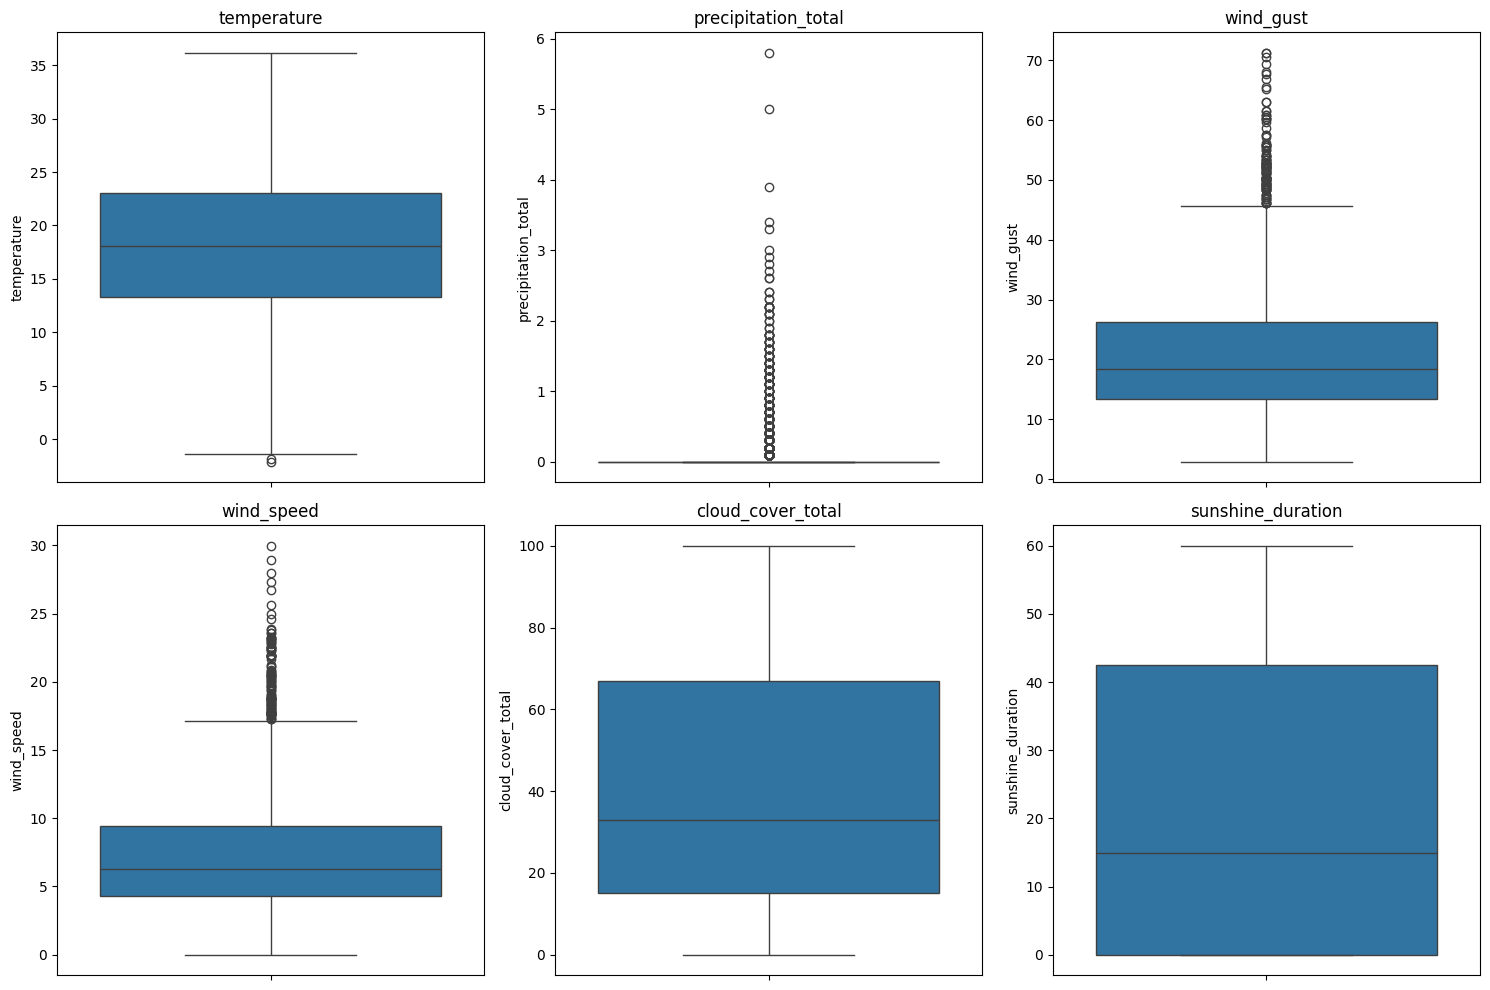

In [84]:
nm_columns = ['temperature', 'precipitation_total', 'wind_gust',
       'wind_speed', 'cloud_cover_total', 'sunshine_duration']
plt.figure(figsize=(15, 10))
for i, col in enumerate(nm_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=data_weather[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Выбросы в столбцах wind_speed и wind_gust могут быть связаны с штормами или другими погодными катаклизмами. Любые осадки precipitation_total могут восприниматься как необычное явление, поэтому на графике они отмечены как выбросы. Выбросы, связанные с отрицательной температурой, связаны со сменой сезона и концом самокатного сезона. 

In [86]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Применение функции к столбцам
outliers = {}
for column in ['temperature', 'precipitation_total', 'wind_gust', 'wind_speed', 'cloud_cover_total', 'sunshine_duration']:
    outliers[column] = detect_outliers_iqr(data_weather, column)

# Вывод выбросов
for key, value in outliers.items():
    print(f'Выбросы в {key}:')
    print(value)

Выбросы в temperature:
               datetime  temperature  precipitation_total  wind_gust  \
125 2023-04-06 04:00:00    -1.869755                  0.0  10.080000   
126 2023-04-06 05:00:00    -2.079755                  0.0  10.440001   

     wind_speed  cloud_cover_total  sunshine_duration  
125    3.075841               18.6           0.000000  
126    3.075841                6.6           2.131111  
Выбросы в precipitation_total:
                datetime  temperature  precipitation_total  wind_gust  \
1    2023-04-01 00:00:00     8.740245                  0.1      48.60   
2    2023-04-01 01:00:00     9.040245                  0.2      55.44   
3    2023-04-01 02:00:00     8.880245                  0.3      55.80   
4    2023-04-01 03:00:00     8.690246                  0.3      55.44   
5    2023-04-01 04:00:00     8.630245                  0.3      48.96   
...                  ...          ...                  ...        ...   
3649 2023-08-31 00:00:00    15.100245             

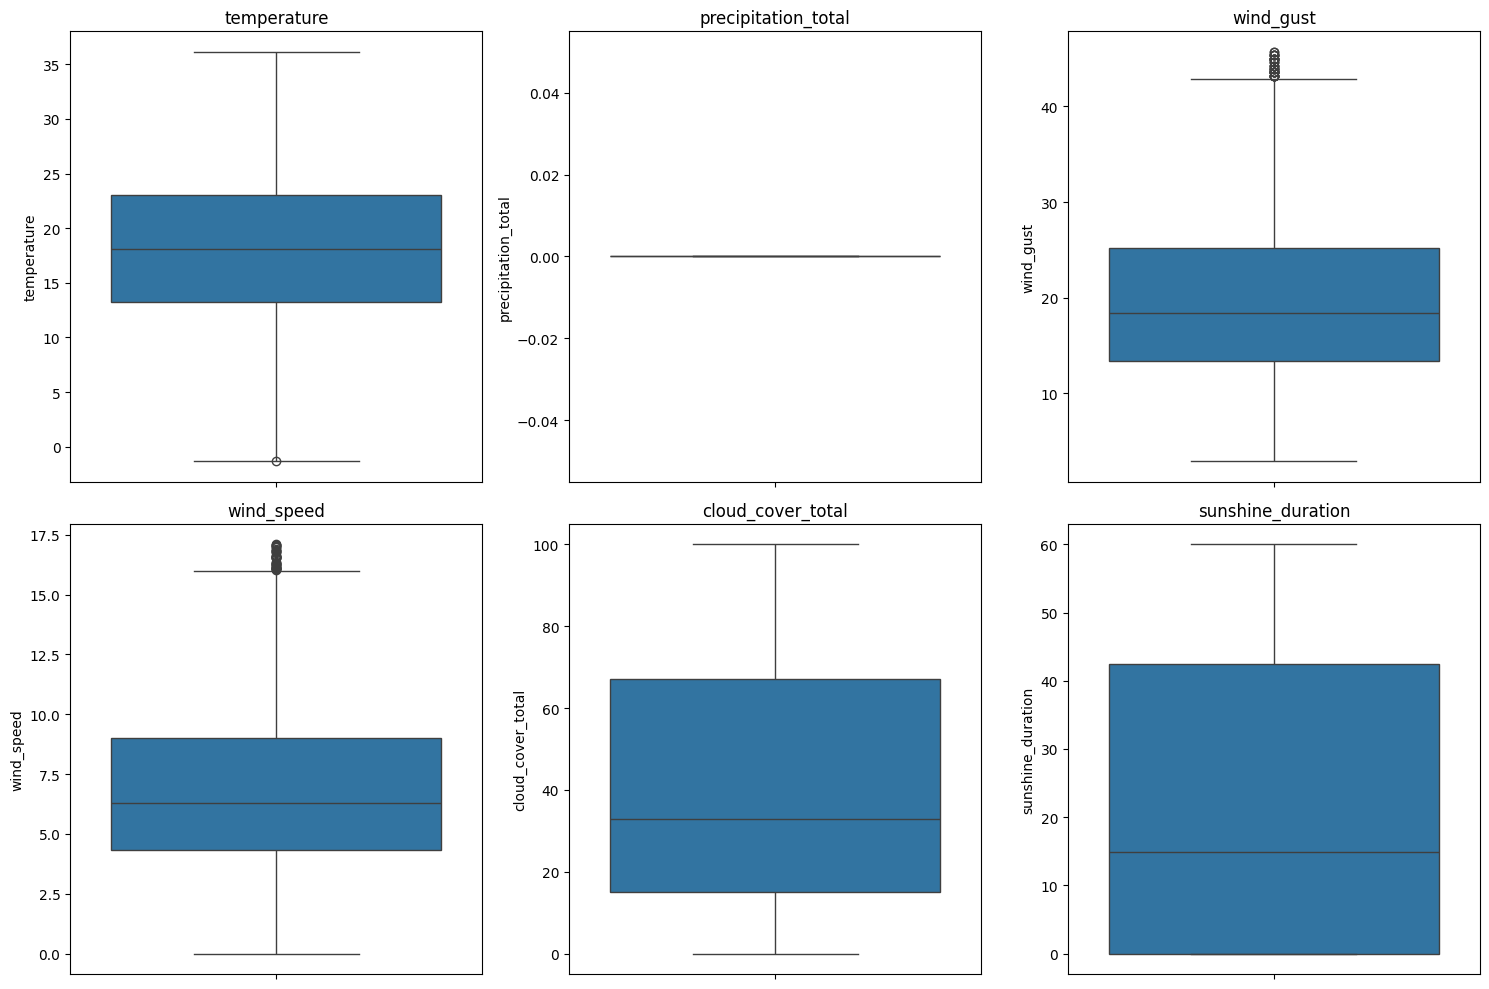

In [89]:
def handle_outliers(df, column):
    # Заменяем выбросы на медиану
    median = df[column].median()
    df[column] = np.where((df[column] < (df[column].quantile(0.25) - 1.5 * (df[column].quantile(0.75) - df[column].quantile(0.25)))) |
                           (df[column] > (df[column].quantile(0.75) + 1.5 * (df[column].quantile(0.75) - df[column].quantile(0.25)))),
                           median, df[column])

for column in ['temperature', 'precipitation_total', 'wind_gust', 'wind_speed', 'cloud_cover_total', 'sunshine_duration']:
    handle_outliers(data_weather, column)
    
    
    
nm_columns = ['temperature', 'precipitation_total', 'wind_gust',
       'wind_speed', 'cloud_cover_total', 'sunshine_duration']
plt.figure(figsize=(15, 10))
for i, col in enumerate(nm_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=data_weather[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
data_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3670 entries, 3 to 3672
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   datetime             3670 non-null   object 
 1   temperature          3615 non-null   float64
 2   precipitation_total  3640 non-null   float64
 3   wind_gust            3670 non-null   float64
 4   wind_speed           3654 non-null   float64
 5   cloud_cover_total    3650 non-null   float64
 6   sunshine_duration    3658 non-null   float64
dtypes: float64(6), object(1)
memory usage: 200.8+ KB


In [75]:
data_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 1 to 3672
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             3672 non-null   datetime64[ns]
 1   temperature          3617 non-null   float64       
 2   precipitation_total  3642 non-null   float64       
 3   wind_gust            3672 non-null   float64       
 4   wind_speed           3656 non-null   float64       
 5   cloud_cover_total    3652 non-null   float64       
 6   sunshine_duration    3660 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 200.9 KB


In [67]:
# mask = data_weather["datetime"].contains('2023-04-16')
# # mask = data_weather.loc[data_weather["datetime"]]
# mask
# filtered_df = data_weather.loc[(data_weather['datetime'] >= '2023-04-16 00:00:00') & (data_weather['datetime'] <= '2023-04-17 00:00:00')]
# filtered_df
min(data_weather[["datetime"]])

'datetime'

In [53]:

null_data = data_weather[data_weather[["temperature"]].isnull().any(axis=1)]
null_data

,datetime,temperature,precipitation_total,wind_gust,wind_speed,cloud_cover_total,sunshine_duration
360,2023-04-16 02:00:00,NaN,0.3,13.320000,3.671294,100.000000,0.000000
361,2023-04-16 03:00:00,NaN,0.4,13.320000,4.452954,98.000000,0.000000
362,2023-04-16 04:00:00,NaN,0.4,13.320000,4.802999,100.000000,0.000000
363,2023-04-16 05:00:00,NaN,0.3,13.679999,4.379589,100.000000,0.000000
364,2023-04-16 06:00:00,NaN,0.2,14.400000,5.052841,100.000000,0.000000
365,2023-04-16 07:00:00,NaN,0.3,15.480000,6.379216,100.000000,0.000000
366,2023-04-16 08:00:00,NaN,0.2,19.080000,9.957108,100.000000,0.000000
367,2023-04-16 09:00:00,NaN,0.2,24.480000,10.383987,100.000000,0.000000
368,2023-04-16 10:00:00,NaN,0.2,24.480000,7.704336,100.000000,0.000000
369,2023-04-16 11:00:00,NaN,0.3,24.840000,8.534353,91.000000,4.848486


In [8]:
data_weather.isna()

,datetime,temperature,precipitation_total,wind_gust,wind_speed,cloud_cover_total,sunshine_duration
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
3668,False,False,False,False,False,False,False
3669,False,False,False,False,False,False,False
3670,False,False,False,False,False,False,False
3671,False,False,False,False,False,False,False
